In [2]:
import sys
assert sys.version_info >= (3,7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse('1.0.1')
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path,format=fig_extension, dpi=resolution)

# Maquinas de soporte vectorial

In [5]:
from sklearn.svm import SVC
from sklearn import datasets


iris = datasets.load_iris(as_frame=True)

# Print firts 5 rows of the dataset


X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = iris.target
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

iris.data.head(10)

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

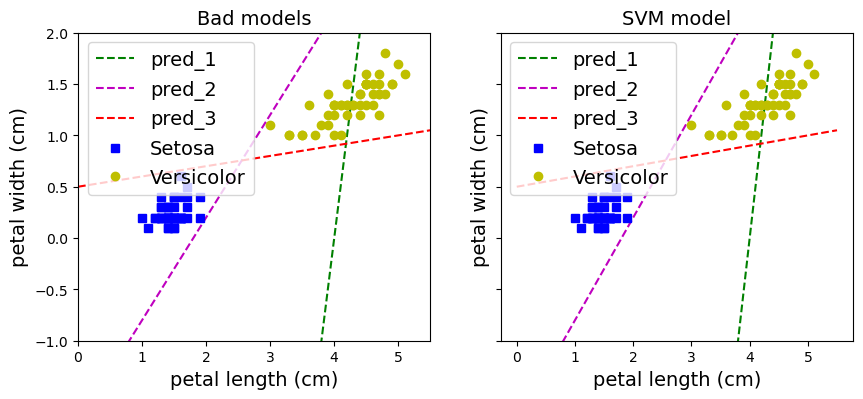

In [ ]:
# SVM classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0,5.5,200)
pred_1 = 5 * x0 -20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_cls, xmin, xmax):
    w = svm_cls.coef_[0]
    b = svm_cls.intercept_[0]
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1/ w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_cls.support_vectors_
    
    plt.plot(x0, decision_boundary, "k-", linewidth=2,zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2,zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2,zorder=-2)
    plt.scatter(svs[:,0], svs[:,1], s=180, facecolors='#AAA', zorder=-1)
    

fig, axes = plt.subplots(ncols=2,figsize=(10,4), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", label="pred_1")
plt.plot(x0, pred_2, "m--", label="pred_2")
plt.plot(x0, pred_3, "r--", label="pred_3")
plt.plot(X[:,0][y==0], X[:,1][y==0], "bs", label="Setosa")
plt.plot(X[:,0][y==1], X[:,1][y==1], "yo", label="Versicolor")
plt.title("Bad models")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(loc="upper left")
plt.axis([0, 5.5, -1, 2])


plt.sca(axes[1])
plt.plot(x0, pred_1, "g--", label="pred_1")
plt.plot(x0, pred_2, "m--", label="pred_2")
plt.plot(x0, pred_3, "r--", label="pred_3")
plt.plot(X[:,0][y==0], X[:,1][y==0], "bs", label="Setosa")
plt.plot(X[:,0][y==1], X[:,1][y==1], "yo", label="Versicolor")
plt.title("SVM model")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


